In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0,3, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    print(data)
    return data[:, :2], data[:, -1]

In [130]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

[[ 5.1  0.2 -1. ]
 [ 4.9  0.2 -1. ]
 [ 4.7  0.2 -1. ]
 [ 4.6  0.2 -1. ]
 [ 5.   0.2 -1. ]
 [ 5.4  0.4 -1. ]
 [ 4.6  0.3 -1. ]
 [ 5.   0.2 -1. ]
 [ 4.4  0.2 -1. ]
 [ 4.9  0.1 -1. ]
 [ 5.4  0.2 -1. ]
 [ 4.8  0.2 -1. ]
 [ 4.8  0.1 -1. ]
 [ 4.3  0.1 -1. ]
 [ 5.8  0.2 -1. ]
 [ 5.7  0.4 -1. ]
 [ 5.4  0.4 -1. ]
 [ 5.1  0.3 -1. ]
 [ 5.7  0.3 -1. ]
 [ 5.1  0.3 -1. ]
 [ 5.4  0.2 -1. ]
 [ 5.1  0.4 -1. ]
 [ 4.6  0.2 -1. ]
 [ 5.1  0.5 -1. ]
 [ 4.8  0.2 -1. ]
 [ 5.   0.2 -1. ]
 [ 5.   0.4 -1. ]
 [ 5.2  0.2 -1. ]
 [ 5.2  0.2 -1. ]
 [ 4.7  0.2 -1. ]
 [ 4.8  0.2 -1. ]
 [ 5.4  0.4 -1. ]
 [ 5.2  0.1 -1. ]
 [ 5.5  0.2 -1. ]
 [ 4.9  0.2 -1. ]
 [ 5.   0.2 -1. ]
 [ 5.5  0.2 -1. ]
 [ 4.9  0.1 -1. ]
 [ 4.4  0.2 -1. ]
 [ 5.1  0.2 -1. ]
 [ 5.   0.3 -1. ]
 [ 4.5  0.3 -1. ]
 [ 4.4  0.2 -1. ]
 [ 5.   0.6 -1. ]
 [ 5.1  0.4 -1. ]
 [ 4.8  0.3 -1. ]
 [ 5.1  0.2 -1. ]
 [ 4.6  0.2 -1. ]
 [ 5.3  0.2 -1. ]
 [ 5.   0.2 -1. ]
 [ 7.   1.4  1. ]
 [ 6.4  1.5  1. ]
 [ 6.9  1.5  1. ]
 [ 5.5  1.3  1. ]
 [ 6.5  1.5  1. ]
 [ 5.7  1.

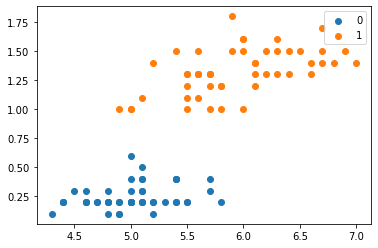

In [131]:
plt.scatter(X[:50, 0], X[:50, 1], label='0')
plt.scatter(X[50:, 0], X[50:, 1], label='1')
plt.legend()

In [132]:
print (1 < 2 < 3)

True


In [133]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel
    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        self.C = 1.0
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j]*self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return np.dot(x1, x2)
        elif self._kernel == 'poly':
            return (np.dot(x1, x2) + 1)**2
        return 0
    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif self.alpha[i] >0 and self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1
    def _E(self, i):
        return self._g(i) - self.Y[i]
    
    def _init_alpha(self):
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        no_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(no_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue
            E1 = self.E[i]
            if E1 >= 0:
                j = min([t for t in range(self.m) if t is not i], key=lambda x :self.E[x])
            else:
                j = max([t for t in range(self.m) if t is not i], key=lambda x :self.E[x])
            return i, j
    def _cut(self, _alpha_unc, L, H):
        if _alpha_unc > H:
            return H
        elif L <= _alpha_unc <= H:
            return _alpha_unc
        else:
            return L

    def _compute_bound(self, i1, i2):
        a_1 = self.alpha[i1]
        a_2 = self.alpha[i2]
        y_1 = self.Y[i1]
        y_2 = self.Y[i2]
        return (max(0, a_2 - a_1), min(self.C, self.C + a_2 - a_1)) if y_1 != y_2 else \
                (max(0, a_2 + a_1 - self.C), min(self.C, a_2 + a_1))

    def _compute_new_unc_alpha2(self, i1, i2, E1, E2, K11, K12, K22):
        alpha_new_unc2 = self.alpha[i2] + self.Y[i2] * (E1 - E2) / (K11 + K22 - 2*K12)
        return alpha_new_unc2

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            i1, i2 = self._init_alpha()
            
            L, H = self._compute_bound(i1, i2)
            
            E1, E2 = self.E[i1], self.E[i2]

            K11 = self.kernel(self.X[i1], self.X[i1])
            K12 = self.kernel(self.X[i1], self.X[i2])
            K22 = self.kernel(self.X[i2], self.X[i2])

            y1, y2 = self.Y[i1], self.Y[i2]

            alpha_old_1, alpha_old_2 = self.alpha[i1], self.alpha[i2]

            alpha_new_unc2 = self._compute_new_unc_alpha2(i1, i2, E1, E2, K11, K12, K22)

            alpha_new_2 = self._cut(alpha_new_unc2, L, H)
            
            alpha_new_1 = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (self.alpha[i2] - alpha_new_2)

            b_new_1 = -E1 - y1 * K11 * (alpha_new_1 - alpha_old_1) - y2 * K12 * (alpha_new_2 - alpha_old_2) + self.b

            b_new_2 = -E2 - y1 * K12 * (alpha_new_1 - alpha_old_1) - y2 * K22 * (alpha_new_2 - alpha_old_2) + self.b


            if 0 < alpha_new_1 < self.C:
                b_new = b_new_1
            elif 0 < alpha_new_2 < self.C:
                b_new = b_new_2
            else:
                b_new = (b_new_1 + b_new_2) / 2.0
            
            self.alpha[i1] = alpha_new_1
            self.alpha[i2] = alpha_new_2

            self.b = b_new

            self.E = [self._E(i) for i in range(self.m)]
        return 'done'
    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])
        
        return 1 if r > 0 else -1
    
    def score(self, X_test, Y_test):
        right_count = 0

        for x, y in zip(X_test, Y_test):
            result = self.predict(x)
            if result == y:
                right_count += 1
        return right_count / len(X_test)

In [137]:
svm = SVM(max_iter=200, kernel='linear')

In [138]:
svm.fit(X_train, y_train)

'done'

In [139]:
svm.score(X_test, y_test)

1.0

In [140]:
from sklearn.svm import SVC

In [141]:
slf = SVC(kernel='linear')
slf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
slf.score(X_test, y_test)

1.0